<a href="https://colab.research.google.com/github/Lariiuki/Aprendizado-de-m-quina/blob/main/Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas

In [91]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
# visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #divisao dos dados em treino e teste
from sklearn.metrics import classification_report #metricas para avaliar o desempenho
from mlxtend.plotting import plot_decision_regions
import numpy as np

In [6]:
dataset = pd.read_csv("/content/drive/MyDrive/Especialização/MonitoriaEmbraer-main/Datasets/Iris.csv")
dataset.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
dataset.shape

(150, 5)

In [17]:
target_col = "Species"
print(f"Quantas classes existem nesse dataset: {len(dataset[target_col].unique())}")
print(f"Quantas instancias existem: {dataset.shape[0]}")
print(f"Quantidade features: {dataset.shape[1] -1}")

Quantas classes existem nesse dataset: 3
Quantas instancias existem: 150
Quantidade features: 4


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

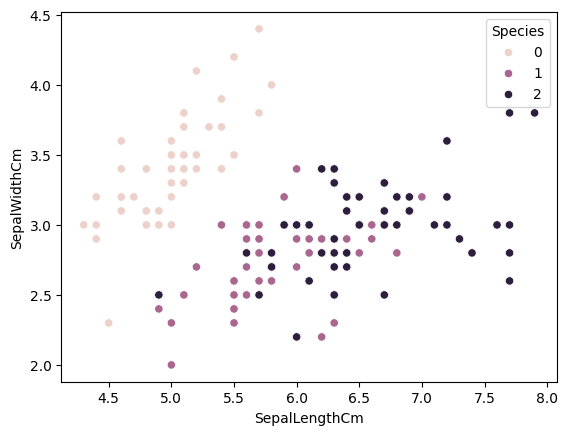

In [102]:
sns.scatterplot(data=dataset, x="SepalLengthCm", y="SepalWidthCm", hue="Species")

In [103]:
dataset['Species'] = pd.factorize(dataset['Species'])[0]

In [104]:
#iloc(indices)
a = dataset.iloc[:,[0, 1]]
print(a)

     SepalLengthCm  SepalWidthCm
0              5.1           3.5
1              4.9           3.0
2              4.7           3.2
3              4.6           3.1
4              5.0           3.6
..             ...           ...
145            6.7           3.0
146            6.3           2.5
147            6.5           3.0
148            6.2           3.4
149            5.9           3.0

[150 rows x 2 columns]


In [105]:
b = dataset.iloc[:,[4]]
print(b)

     Species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


In [106]:
#loc(rotulos)
X = dataset.loc[:, ["SepalLengthCm", "SepalWidthCm"]] # variavel de entrada
print(X)
y = dataset["Species"] #variavel de saida
print(y)

     SepalLengthCm  SepalWidthCm
0              5.1           3.5
1              4.9           3.0
2              4.7           3.2
3              4.6           3.1
4              5.0           3.6
..             ...           ...
145            6.7           3.0
146            6.3           2.5
147            6.5           3.0
148            6.2           3.4
149            5.9           3.0

[150 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [108]:
model = KNeighborsClassifier()
# model = KNeighborsClassifier(n_neighbors=7, metric="euclidean"
model.fit(X_train, y_train) #fit = treinar

KNeighborsClassifier()

In [109]:
#RadiusNeighborsClassifier adaptativo

In [110]:
X_test

,SepalLengthCm,SepalWidthCm
73,6.1,2.8
18,5.7,3.8
118,7.7,2.6
78,6.0,2.9
76,6.8,2.8
31,5.4,3.4
64,5.6,2.9
141,6.9,3.1
68,6.2,2.2
82,5.8,2.7


In [111]:
# para cada dado em X_test no que ele aprendeu, ele vai avaliar qual especie
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 1,
       0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 0,
       0])

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.62      0.62      0.62        13
           2       0.62      0.62      0.62        13

    accuracy                           0.78        45
   macro avg       0.74      0.74      0.74        45
weighted avg       0.78      0.78      0.78        45



In [113]:
X.columns[1]

'SepalWidthCm'

In [114]:
y.values.flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [115]:
# vamos criar um classificador kNN com k=5
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# e ver a sua performance no dataset de teste
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.62      0.62      0.62        13
           2       0.62      0.62      0.62        13

    accuracy                           0.78        45
   macro avg       0.74      0.74      0.74        45
weighted avg       0.78      0.78      0.78        45



In [116]:
def show_decision_region(X, y, model):
    feature_0 = X.columns[0]
    feature_1 = X.columns[1]

    plot_decision_regions(np.array([X[feature_0].values,
                                    X[feature_1].values]).T,
                                    y.values.flatten(), model)
    """Exemplo -> cria uma lista com esses dois arrays
        [
    [5.1, 4.9, 4.7, ...],  # valores da primeira feature
    [3.5, 3.0, 3.2, ...]   # valores da segunda feature
    ]
    Tranforma em uma matriz 2D
        [
    [5.1, 3.5],
    [4.9, 3.0],
    [4.7, 3.2],
    ...
    ]
    """
    plt.xlabel(feature_0)
    plt.ylabel(feature_1)

    plt.title(model.__class__.__name__ + " k = " + str(model.n_neighbors))
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


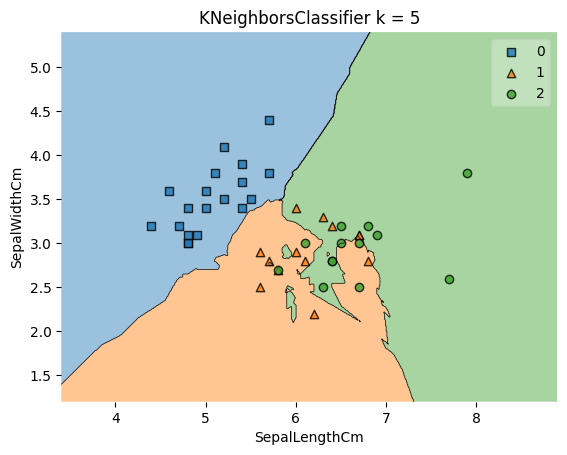

In [117]:
show_decision_region(X_test, y_test, model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.62      0.38      0.48        13
           2       0.56      0.77      0.65        13

    accuracy                           0.76        45
   macro avg       0.73      0.72      0.71        45
weighted avg       0.76      0.76      0.75        45



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


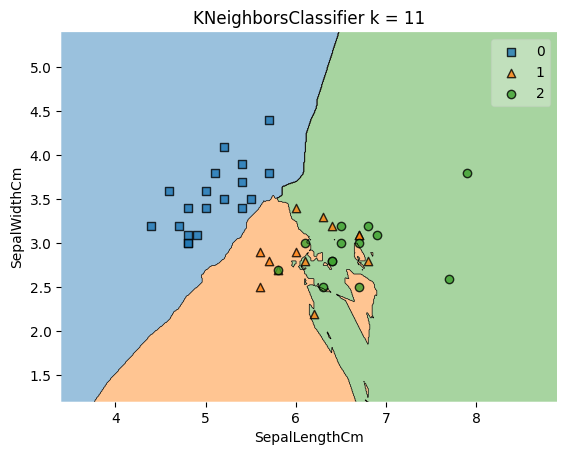

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.67      0.62      0.64        13
           2       0.64      0.69      0.67        13

    accuracy                           0.80        45
   macro avg       0.77      0.77      0.77        45
weighted avg       0.80      0.80      0.80        45



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


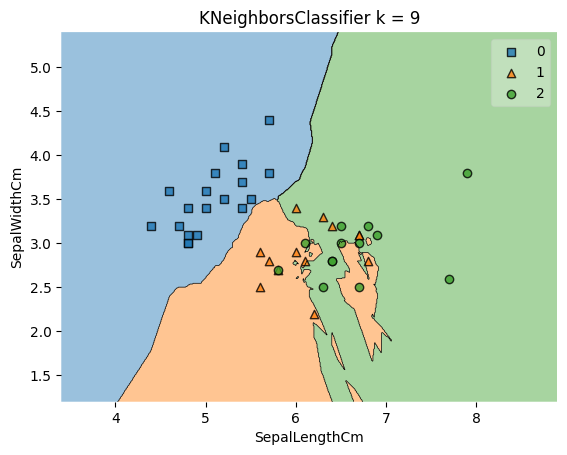

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.67      0.62      0.64        13
           2       0.64      0.69      0.67        13

    accuracy                           0.80        45
   macro avg       0.77      0.77      0.77        45
weighted avg       0.80      0.80      0.80        45



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


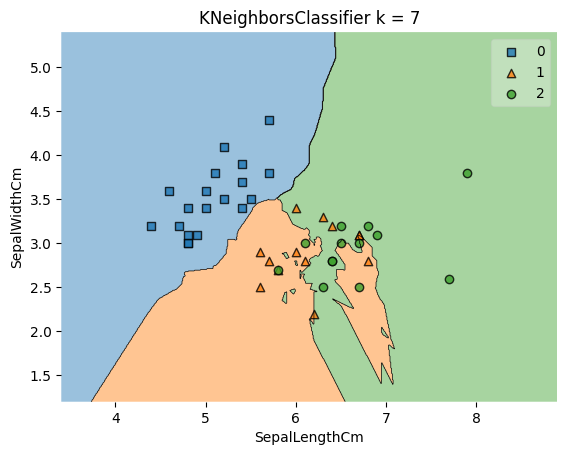

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.62      0.62      0.62        13
           2       0.62      0.62      0.62        13

    accuracy                           0.78        45
   macro avg       0.74      0.74      0.74        45
weighted avg       0.78      0.78      0.78        45



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


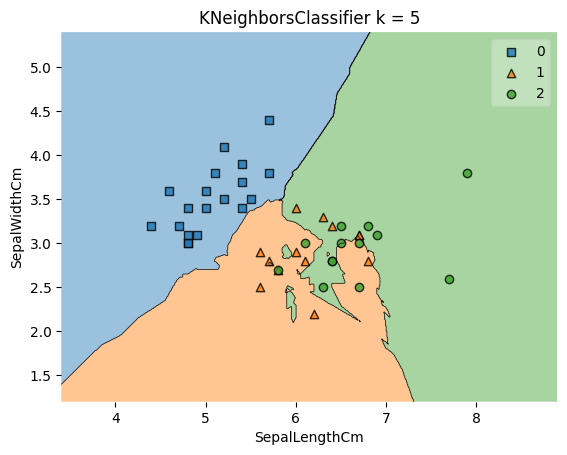

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.58      0.54      0.56        13
           2       0.57      0.62      0.59        13

    accuracy                           0.76        45
   macro avg       0.72      0.72      0.72        45
weighted avg       0.76      0.76      0.76        45



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


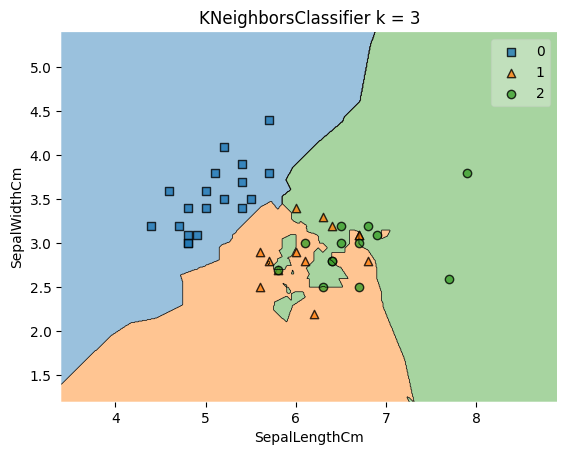

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.50      0.54      0.52        13
           2       0.50      0.46      0.48        13

    accuracy                           0.71        45
   macro avg       0.67      0.67      0.67        45
weighted avg       0.71      0.71      0.71        45



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


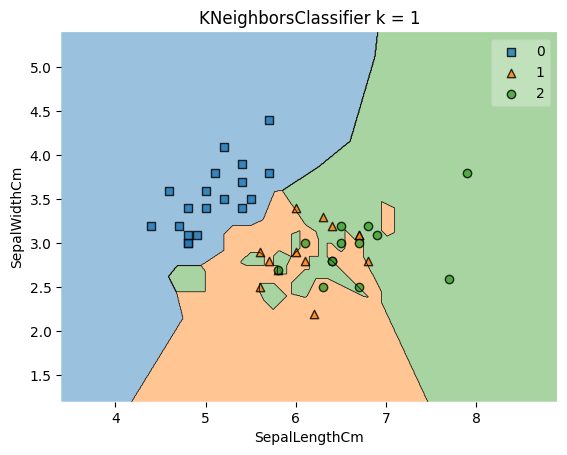

In [119]:
for k in[11, 9, 7, 5, 3, 1]:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  print(classification_report(y_test, model.predict(X_test)))

  show_decision_region(X_test, y_test, model)

In [120]:
def manhattan_custom_distance(x, y, weights=np.array([2, 1])):
    return (abs(x - y)*weights).sum() #somamos a diferença absoluta em cada dimensão (feature) para medir a distância total
"""A primeira feature tem peso 2

A segunda feature tem peso 1"""

'A primeira feature tem peso 2\n\nA segunda feature tem peso 1'

--------------------
euclidean
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.62      0.62      0.62        13
           2       0.62      0.62      0.62        13

    accuracy                           0.78        45
   macro avg       0.74      0.74      0.74        45
weighted avg       0.78      0.78      0.78        45



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


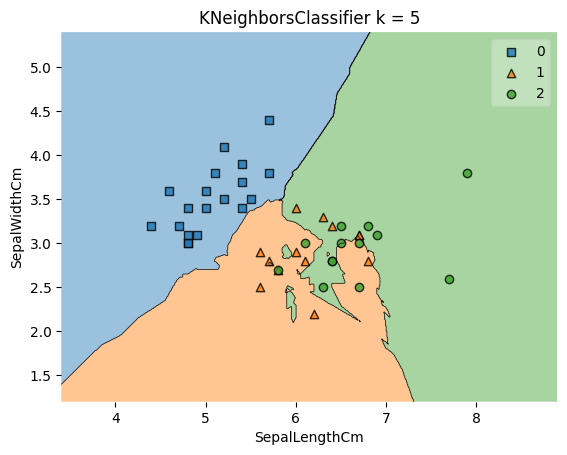

--------------------
manhattan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.67      0.62      0.64        13
           2       0.64      0.69      0.67        13

    accuracy                           0.80        45
   macro avg       0.77      0.77      0.77        45
weighted avg       0.80      0.80      0.80        45



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


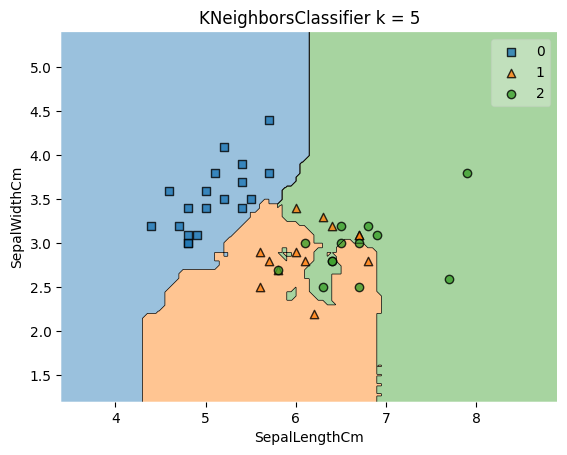

--------------------
<function manhattan_custom_distance at 0x7e338e9180e0>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.64      0.54      0.58        13
           2       0.60      0.69      0.64        13

    accuracy                           0.78        45
   macro avg       0.75      0.74      0.74        45
weighted avg       0.78      0.78      0.78        45



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


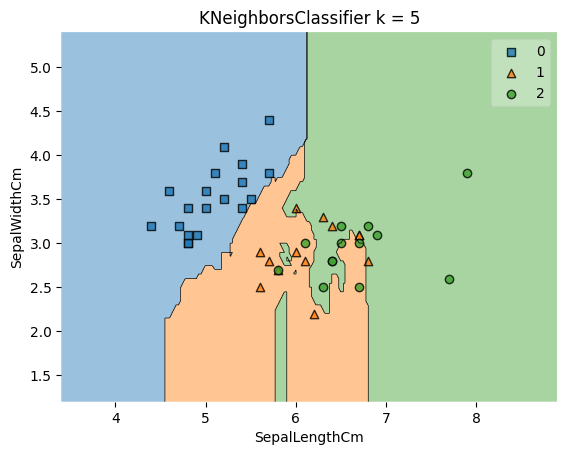

In [121]:
for m in ["euclidean", "manhattan", manhattan_custom_distance]:
    print("-"*20)
    print(str(m))

    model = KNeighborsClassifier(n_neighbors=5, metric=m)
    model.fit(X_train, y_train)

    # performance no dataset de test
    print(classification_report(y_test, model.predict(X_test)))

    show_decision_region(X_test, y_test, model)